In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [104]:
def generate_experiment_df(samples_per_combo=50, seed=42, sigma=0.01):
    rng = np.random.default_rng(seed)
    clients = np.arange(1, 7)
    fed = ["centralized", "federated"]
    rows = []
    for c in clients:
        for f in fed:
            mu = 0.5
            throughput = rng.normal(mu, sigma, samples_per_combo)
            # base throughput depends on how far c is from max
            if f == "centralized":
                throughput = 150000 - abs((3 - c) * 40000) + throughput * 10000
            else:
                throughput = 200000 - abs((5 - c) * 20000) + throughput * 20000
            rows.append(pd.DataFrame({
                "federated": f,
                "clientsPerPi": c,
                "throughput": throughput
            }))
        df = pd.concat(rows, ignore_index=True)
    return df

In [105]:
df = generate_experiment_df()

In [106]:
print(df.head())

     federated  clientsPerPi    throughput
0  centralized             1  75030.471708
1  centralized             1  74896.001589
2  centralized             1  75075.045120
3  centralized             1  75094.056472
4  centralized             1  74804.896481


In [111]:
def barchart_throughput(df):
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x="clientsPerPi", y="throughput", hue="federated")
    
    plt.title("Maximum throughput by Clients per Pi and depending on federation setting")
    plt.xlabel("Clients per Pi")
    plt.ylabel("Throughput (Tuples/millisec)")
    plt.legend(title="Federated Setting")
    plt.grid(axis='y')
    plt.tight_layout()

    plt.savefig("throughput_artificial_barchart.svg")
    

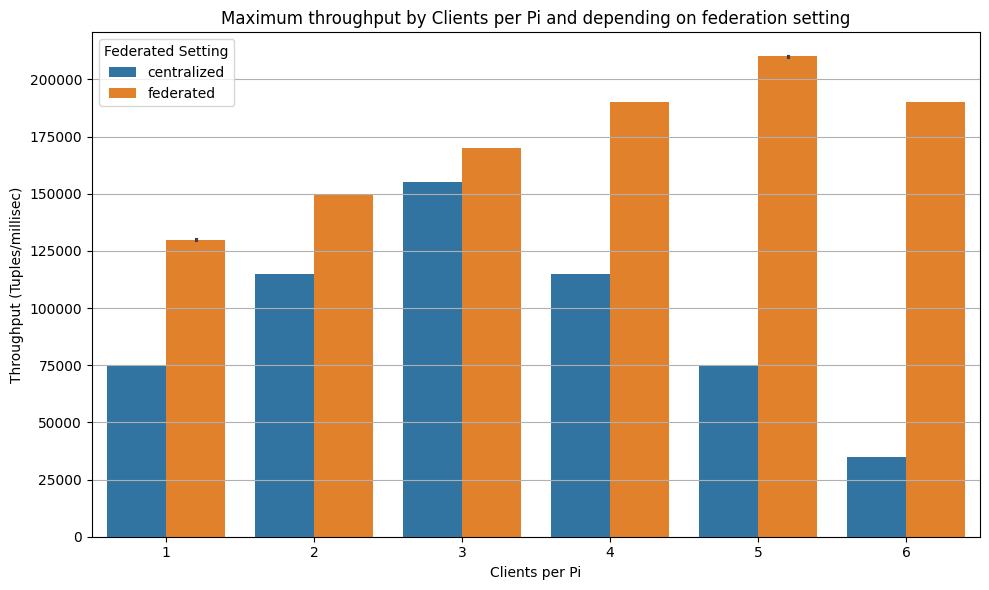

In [112]:
barchart_throughput(df)